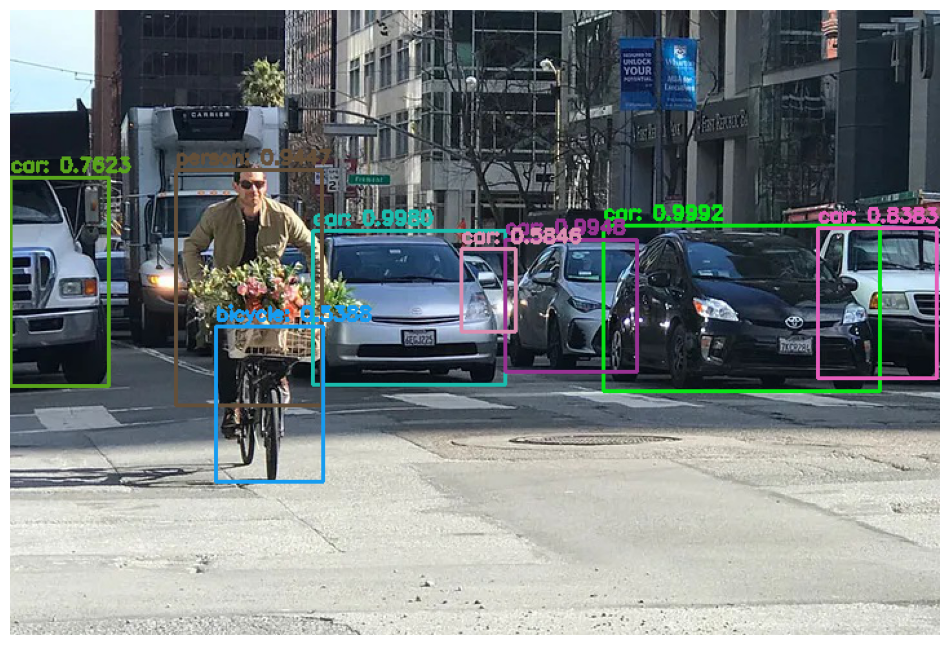

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

weights_path = './yolo/yolov3.weights'
cfg_path = './yolo/yolov3.cfg'
names_path = './yolo/coco.names'

with open(names_path, 'r') as f:
    class_names = f.read().strip().split('\n')

net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)

#image load 
img_path = './yolo/Yolo_Test_Image.jpg'
img = cv2.imread(img_path)
height, width = img.shape[:2]

#preprocessing for yolo
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB = True, crop =False)
net.setInput(blob)

layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
outputs = net.forward(output_layers)

boxes = []
confidences = []
class_ids = []

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            box = detection[0:4] * np.array([width, height, width, height])
            (centerX, centerY, w, h) = box.astype("int")
            x = int(centerX - (w/2))
            y = int(centerY - (h/2))
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in np.random.randint(0, 255, size = 3)]
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        text = "{}: {:.4f}".format(class_names[class_ids[i]], confidences[i])
        cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

output_image_path = './yolo/output_image.jpg'
cv2.imwrite(output_image_path, img)